In [444]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [414]:
df = pd.read_csv('insurance_data.csv')
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


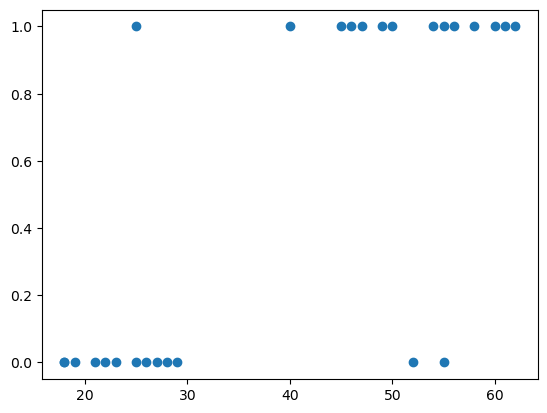

In [415]:
plt.scatter(df.age, df.bought_insurance)

In [416]:
X = df['age'].to_numpy()
Y = df['bought_insurance'].to_numpy()

In [417]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [418]:
def gradient(X, Y, m, c):
    z = np.dot(X, m) + c  # Linear model
    y_pred = sigmoid(z)    # Apply sigmoid function
    
    # Gradients for slope (m) and intercept (c)
    grad_c = (1 / len(Y)) * np.sum(y_pred - Y)
    grad_m = (1 / len(Y)) * np.dot(X, y_pred - Y)
    
    return grad_m, grad_c

In [433]:
def gradient_descent(X, Y):
    # Initialize m (slope) and c (intercept)
    m = 0  # Scalar for a single feature
    c = 0  # Scalar for bias/intercept
    costs = []
    ite = []
    for i in range(100000):
        # Compute the gradient
        val1 = 0
        val2 = 0
        for x in range(0, len(X)):
            val1 +=Y[x] * math.log(sigmoid(X[x] * m + c))
            val2 += (1 - Y[x]) * math.log(1 - (sigmoid(X[x] * m + c)))
        cost = -1 * (val1 + val2)
        grad_m, grad_c = gradient(X, Y, m, c)
        # Update the slope (m) and intercept (c)
        m = m - 0.001 * grad_m
        c = c - 0.001 * grad_c
        if (i % 1000 == 0):
            ite.append(i)
            costs.append(cost)
            print(m, c)
            print(cost)
    return m, c, costs, ite

In [420]:
def thresholding(val):
    if (val > 0.5): 
        return 1
    else: 
        return 0

In [451]:
def predict(m, c, x):
    z = np.dot(x, m) + c
    sig = 1 / (1 + np.exp(-z))
    a = []
    for i in sig:
        if (i > 0.5):
            a.append(1)
        else:
            a.append(0)
    return a

In [439]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.8)
m_op, c_op, costs, ite = gradient_descent(X_train, y_train)

0.011100000000000002 0.0001
3.465735902799726
0.031067071466991485 -0.14265973000424784
2.649954687017234
0.03430297204484761 -0.28194785606937667
2.5528863849768886
0.03747046370774459 -0.4174655895791744
2.4610013532451873
0.04056972743945319 -0.5492993684879781
2.3740434829260666
0.04360120568573294 -0.6775426973460591
2.291757139408405
0.04656557350526951 -0.8022945398432748
2.213889935735447
0.04946370911603197 -0.9236578444413681
2.1401950037534205
0.052296664796144886 -1.0417382187694475
2.0704327921435963
0.05506563888730083 -1.156642759624048
2.0043724333029207
0.05777194944843808 -1.2684790383834856
1.941792728359629
0.06041700992827566 -1.3773542363600797
1.8824828024916491
0.06300230707287756 -1.4833744209022808
1.8262424822679946
0.06552938116048738 -1.5866439506895726
1.7728824439687725
0.06799980855953246 -1.6872649973822877
1.7222241776137401
0.07041518653439427 -1.7853371703505776
1.67409980642122
0.07277712017382167 -1.8809572313892249
1.6283517961370562
0.07508721128

In [456]:
y_pred = predict(m_op, c_op, X_test)
print(f1_score(y_test, y_pred))

0.8695652173913043


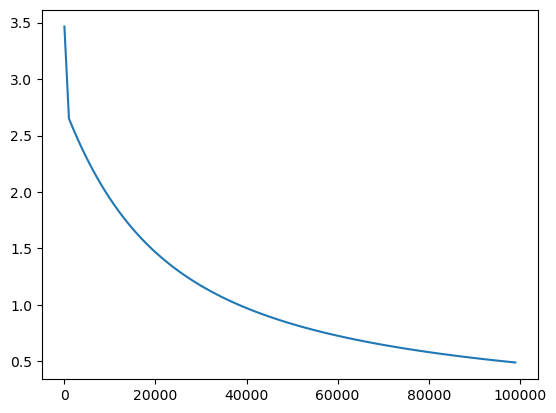

In [440]:
plt.plot(ite, costs)